In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [4]:
PATH = '/Users/fangzheng/Documents/DSML_sem1/DSA5105/project/YELP/train/train_df.csv'
train_df = pd.read_csv(PATH)
PATH = '/Users/fangzheng/Documents/DSML_sem1/DSA5105/project/YELP/test/test_df.csv'
test_df = pd.read_csv(PATH)
PATH = '/Users/fangzheng/Documents/DSML_sem1/DSA5105/project/YELP/full_df.csv'
full_df = pd.read_csv(PATH)

In [5]:
print(train_df.head())

   stars                                               text  label
0      5  My go to place in East Nashville!Three suggest...      2
1      2  Skip it! Not worth the $27.50. The cruise itse...      0
2      2  We came here for lunch with a coupon. In order...      0
3      5  I attended PMA's Risk Management Professional ...      2
4      4  Love the food at El Tumi, but it is truly fami...      2


In [4]:
print(test_df.head())

   stars                                               text  label
0      5  Thank you for great bottle service for bday an...      2
1      3  The experience is fun and girly, but the food ...      1
2      5  This deli is truly as good as it gets.  From t...      2
3      4  Great staff.  Nothing is ever disappointing - ...      2
4      4  My friend lives across the street from here so...      2


* there are no null value in the dataset

In [83]:
full_df.isnull().sum()

stars    0
text     0
label    0
dtype: int64

### Histograms of sentiment distributions:

* Use histograms to visualize the distribution of various emotions in a dataset. This can be done by counting the number of samples in each sentiment category. This visualization provides a clear picture of the relative proportions of each sentiment category in the dataset.

In [2]:
def visualize_data(df,title):
    labels = ["negative", "natural", "positive"]
    sns.set(style="whitegrid")
    ax = sns.countplot(data=df, x='label', palette='viridis')
    ax.set_title(f"{title} Label Distribution")
    ax.set_xlabel("Sentence classes")
    ax.set_ylabel("Frequency")
    ax.set_xticklabels(labels)
    plt.show()


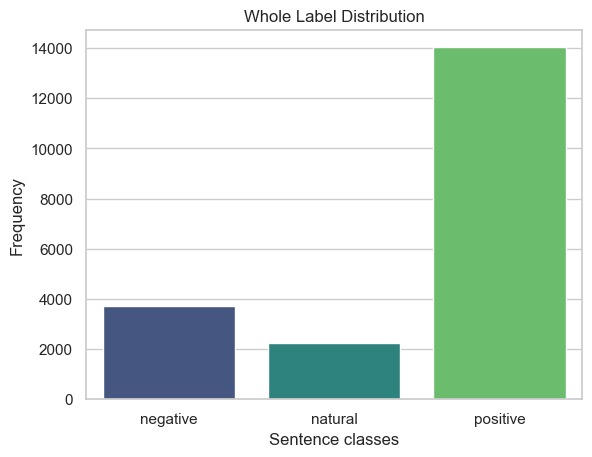

{1: 2241, 2: 14031, 0: 3728}

In [6]:
visualize_data(full_df,"Whole")
dict(Counter(full_df['label']))

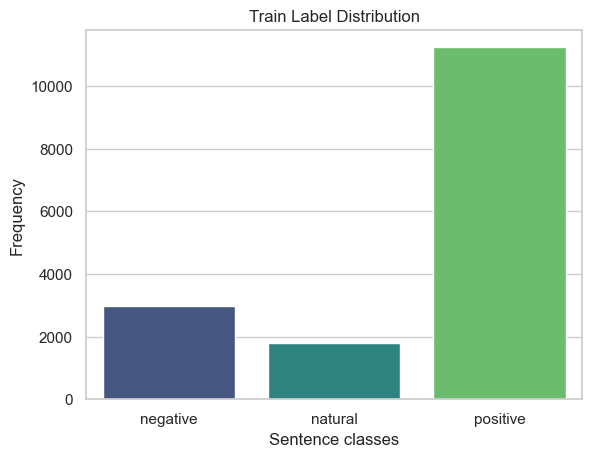

In [79]:
visualize_data(train_df,"Train")

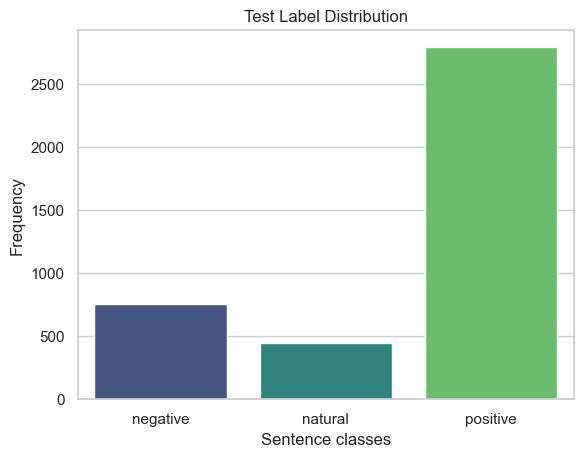

In [80]:
visualize_data(test_df,"Test")

### Conclusion
* The proportion of the three sentiment distributions in the training and test sets is consistent, which is in line with the overall data distribution.
* The proportions of positive reviews are both much higher than the other two sentiment categories, which belongs to the classification task of label imbalance and needs to make response adjustments



### Word cloud diagram:
* Create sentiment word clouds in which the size of sentiment words is proportional to their frequency in the data set. Such word clouds visualize the key sentiment words in the dataset.
* Use wordcloud package from python
* Drop the words in the stop list to only show the words that express emotions
* For ease of presentation, words are uniformly converted to lowercase and punctuation marks are removed from sentences.

In [58]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_sentence(sentence):
    sentence_lower = sentence.lower()
    
    translator = str.maketrans('', '', string.punctuation)
    
    sentence_without_punct = sentence_lower.translate(translator)
    
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([sentence_without_punct])
    processed_sentence = ' '.join(vectorizer.get_feature_names_out())
    
    return processed_sentence
original_sentence = "Hello, world! This is an example sentence."
processed_sentence = preprocess_sentence(original_sentence)
print(processed_sentence)

example hello sentence world


In [44]:
full_df['sentence'] = full_df['text'].apply(preprocess_sentence)
full_df

,stars,text,label,sentence
0,3,"If you decide to eat here, just be aware it is...",1,aware bad beginning come decide diner eat end ...
1,5,I've taken a lot of spin classes over the year...,2,advanced ahead amazing bikes body butt check c...
2,3,Family diner. Had the buffet. Eclectic assortm...,1,assortment attentive breakfast buffet casual c...
3,5,"Wow! Yummy, different, delicious. Our favo...",2,10 changed curry delicious deter did different...
4,4,Cute interior and owner (?) gave us tour of up...,2,added area beautiful beer cheese cheeses cockt...
...,...,...,...,...
19995,1,Manager is a complete asshole. If you have a ...,0,asshole basically brain complete contribute do...
19996,4,"If you're looking for Bingo around St Louis, t...",2,addition alcoholic allow apparently arent ban ...
19997,2,Unfortunately we had a bad experience here...w...,0,1895 actually arnold ate awful bad bitter cabb...
19998,2,Meh. This pizza was basically a deep-dish grea...,0,basically blue cheese deepdish dipping going g...


In [64]:
negative_df = full_df[full_df['label']==0]
neutral_df = full_df[full_df['label']==1]

* Change the sentence into a long str to visualize it in WordCloud

In [59]:
combined_sentences = ' '.join(full_df['sentence'])

In [65]:
negative_sentence = ' '.join(negative_df['sentence'])

In [66]:
netural_sentence = ' '.join(neutral_df['sentence'])

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def plot_wordCloud(sentence,title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentence)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  
    plt.title(f'{title} Word Cloud')
    plt.show()

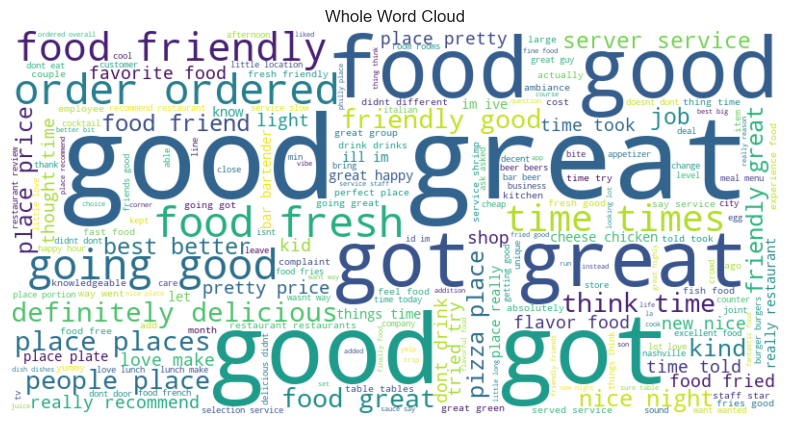

In [73]:
plot_wordCloud(combined_sentences,"Whole")

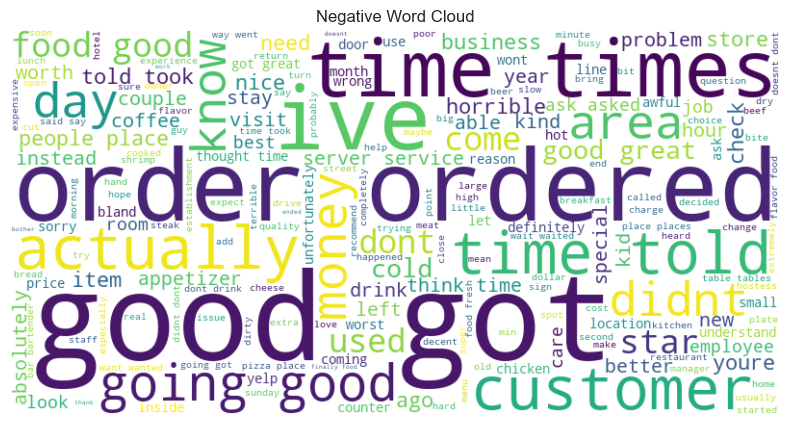

In [75]:
plot_wordCloud(negative_sentence,"Negative")

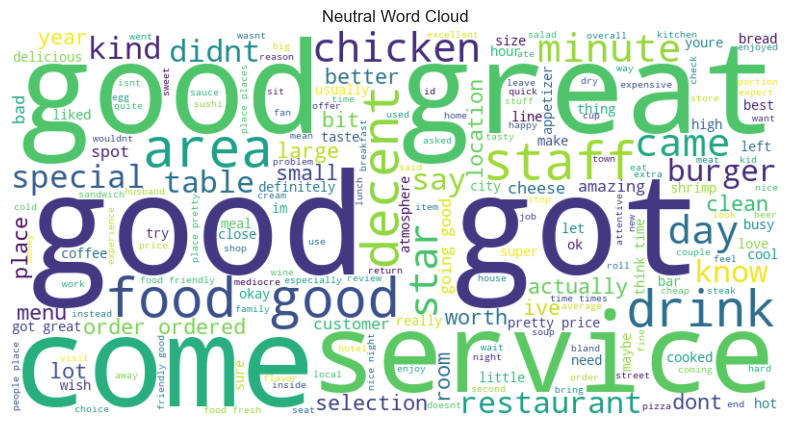

In [74]:
plot_wordCloud(netural_sentence,"Neutral")

### Conclusion
* We can see that there are a lot of positive words in the overall data set, among which good, great friendly are the main ones.
* There are some negative words in negative reviews, such as poor, worst, dirty, etc. * Neutral reviews have a lot of negative words in both positive and negative reviews.
* Neutral reviews have a lot of words that appear in both positive and negative reviews, which may affect the performance of the model, perhaps using a weighted loss function will have better results.